In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/website-traffic/website_wata.csv


In [2]:
df = pd.read_csv('/kaggle/input/website-traffic/website_wata.csv')
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [3]:
df.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

#### Let us see the distribution of the traffic source?

In [4]:
traffic_count = df.groupby('Traffic Source').size().reset_index(name = 'count')
traffic_count

,Traffic Source,count
0,Direct,216
1,Organic,786
2,Paid,428
3,Referral,301
4,Social,269


Text(0, 0.5, 'Count')

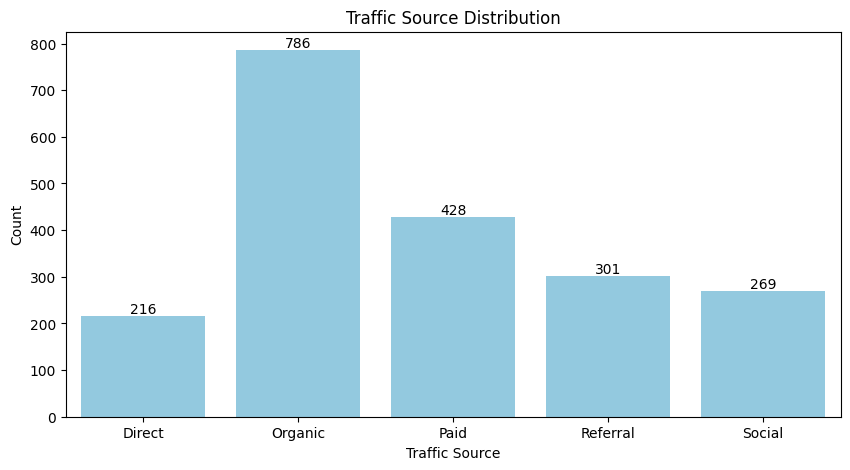

In [5]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = traffic_count, x = 'Traffic Source', y = 'count', color = 'skyblue' )
ax.bar_label(ax.containers[0], fontsize = 10)
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Count')


#### Average session duration by traffic source

In [6]:
session_duration = round(df.groupby('Traffic Source')['Session Duration'].mean().reset_index(name = 'avg_session_duration'),2)
session_duration

,Traffic Source,avg_session_duration
0,Direct,2.69
1,Organic,3.10
2,Paid,2.94
3,Referral,3.13
4,Social,3.06


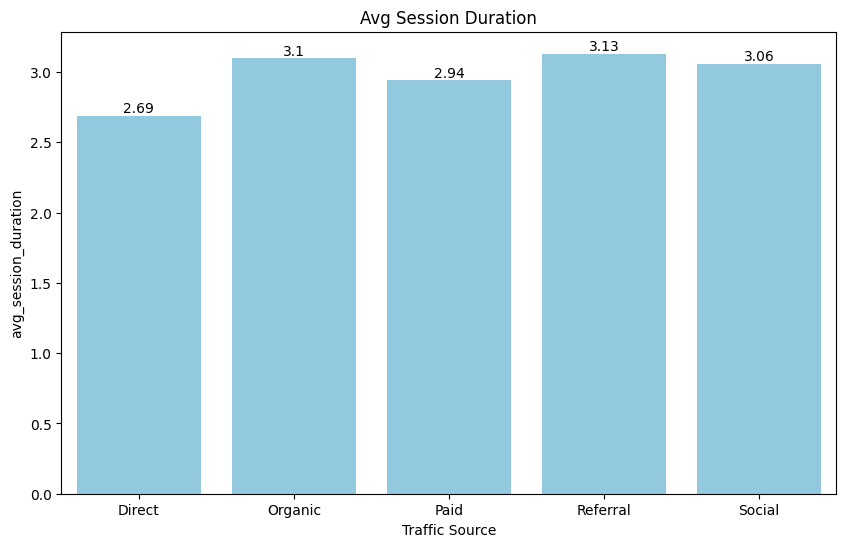

In [7]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = session_duration, x = 'Traffic Source', y = 'avg_session_duration', color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.title('Avg Session Duration')
plt.xlabel('Traffic Source')
plt.ylabel = ('Average duration (in secs)')

#### Relationship between Bounce Rate and Session Duration

Text(0.5, 1.0, 'Session Duration vs Bounce Rate')

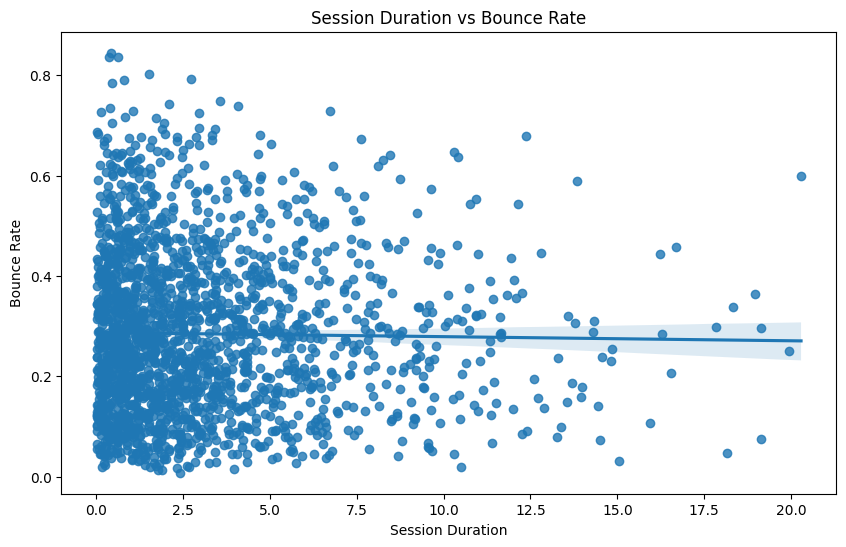

In [8]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Session Duration', y = 'Bounce Rate', data = df)
plt.title('Session Duration vs Bounce Rate')